# Python Data Visualization
**Please use newest python (>=3.6), following the fashion when you don't have to maintain old codes!**

## 0. Content
1. Introduction of basic conceptes
2. Case study by toy data
    - Variable distribution
    - Variable relationship
        - Compare based on x, y axis
            - Categorical-Continuous Relationship
            - Categorical-Categorical Relationship
            - Continuous-Continuous Relationship
        - Compare other than x, y axis
            - Visual code
            - Small multiple
3. Glance of more advanced tools in the python ecosystem 
4. Take Home Message

## 1. Introduction

### 1.1 Package used

In [1]:
import pandas as pd  # process tabular data.
import numpy as np  # process Nd array data, will not use too much today.
import matplotlib  # basic python ploting package.
import matplotlib.pyplot as plt 
import seaborn as sns  # scientific python ploting package, based on matplotlib, more convenient.

import platform
print('python version:', platform.python_version())
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)  # only seaborn version 0.9.0 have scatterplot, which we will use today
# if not, run "conda install seaborn=0.9.0"

import warnings
warnings.simplefilter("ignore")

python version: 3.6.5
pandas version: 0.23.4
numpy version: 1.15.1
matplotlib version: 2.2.3
seaborn version: 0.9.0


#### For config
- Make some general config about plots
- This is very practical, see more details at 
    - [Seaborn part](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - [Matplotlib part](https://matplotlib.org/users/customizing.html)

In [2]:
# some config at begining
sns.set_context("paper", font_scale=0.8)
matplotlib.rc('figure', figsize=(3, 2), dpi=300)  # make figures more clear

### 1.2 Example Data
- Metadata of 25,000 single cell methylation sequencing
- Collected from 10 experiment, 21 replicate
- Some toy analysis results attached

In [3]:
data = pd.read_table('single_cell_data.tsv.gz', index_col=0)
row, col = data.shape
print(f'{row} cells with {col} columns of features')
data.head()

24896 cells with 18 columns of features


total_reads  mapped_reads  filtered_reads  genome_coverage    mcg  \
cell_id                                                                      
cell_0       4061840       2765172         1932779             7.99  0.766   
cell_1       3240886       2226396         1549132             6.46  0.760   
cell_2       5217724       3577060         2339654             9.60  0.778   
cell_3       5552334       3742394         2353156             9.58  0.764   
cell_4       2123406       1421453          958205             4.08  0.778   

           mch experiment replicate plate_col plate_row  tSNE_1  tSNE_2  \
cell_id                                                                   
cell_0   0.021      Exp06      Rep1    col_10     row_A   7.651  12.504   
cell_1   0.020      Exp06      Rep1    col_10     row_A   0.222   6.903   
cell_2   0.020      Exp06      Rep1    col_11     row_A -11.503 -12.931   
cell_3   0.019      Exp06      Rep1    col_11     row_B  -6.435 -25.998   
cell_4   0.021      Exp06      Rep1    col_04     row_D  -0.706  15.875   

         gene1  gene2  gene3  gene4  gene5    cluster  
cell_id                                                
cell_0  -0.803 -0.174 -0.172  0.404 -0.194  Cluster07  
cell_1  -0.684 -0.276 -0.190  0.540 -0.331  Cluster07  
cell_2  -0.501 -0.816  0.221  0.395 -0.202  Cluster03  
cell_3  -0.602 -0.495  0.114  0.446 -0.257  Cluster02  
cell_4  -0.420 -0.478 -0.178  0.567 -0.312  Cluster06

### 1.3 Tidy data vs Non-tidy data
Question: Let's count how many cells are there in each well of 96-well plate, based on column plate_col and plate_row

#### 1.3.1 [Tidy data](https://www.google.com/search?newwindow=1&rlz=1C5CHFA_enUS764US764&biw=1920&bih=960&tbm=isch&sa=1&ei=Z2GXW9AJh__TAqedpPAH&q=tidy+data&oq=tidy+data&gs_l=img.3...0.0..28091...0.0..0.0.0.......1......gws-wiz-img.vCtdDALQVJ0)
- Row is observation, col is variable

In [4]:
# some pandas magic
tidy_count_table = data.groupby(['plate_col', 'plate_row'])\
                       .apply(lambda i: i.shape[0])\
                       .reset_index()\
                       .rename(columns={0: 'cell_count'})
# done
row, col = tidy_count_table.shape
print(f'Tidy data have {row} rows and {col} columns')
tidy_count_table.head(12)

Tidy data have 96 rows and 3 columns


plate_col plate_row  cell_count
0     col_01     row_A         280
1     col_01     row_B         287
2     col_01     row_C         247
3     col_01     row_D         242
4     col_01     row_E         252
5     col_01     row_F         286
6     col_01     row_G         271
7     col_01     row_H         266
8     col_02     row_A         278
9     col_02     row_B         287
10    col_02     row_C         266
11    col_02     row_D         291

#### 1.3.2 Non-tidy data
- This is what you would expect for a 96-well count table, but not easy for programming.

In [5]:
non_tidy_count_table = tidy_count_table.set_index(['plate_col', 'plate_row']).unstack().T
non_tidy_count_table.index = non_tidy_count_table.index.droplevel(0)
non_tidy_count_table

plate_col  col_01  col_02  col_03  col_04  col_05  col_06  col_07  col_08  \
plate_row                                                                   
row_A         280     278     294     281     259     272     290     275   
row_B         287     287     287     280     286     278     280     277   
row_C         247     266     281     274     282     281     278     271   
row_D         242     291     289     272     279     279     270     283   
row_E         252     274     286     242     280     276     261     259   
row_F         286     266     278     272     274     263     269     263   
row_G         271     266     249     264     250     260     254     235   
row_H         266     255     238     249     253     256     247     210   

plate_col  col_09  col_10  col_11  col_12  
plate_row                                  
row_A         279     282     228     176  
row_B         272     283     272     195  
row_C         285     280     288     180  
row_D         278     276     225     168  
row_E         269     273     265     184  
row_F         262     268     259     169  
row_G         251     265     252     158  
row_H         240     243     223     148

#### 1.3.3 Why is this important?
- **Because it makes programming discription much easier. Think about > 3 variables when making plots**
- [Theoretical support](http://vita.had.co.nz/papers/tidy-data.pdf) which you won't read

#### 1.3.4 \[Not For Today\] How to play with this transformation magic?
- Use pandas, which is not discussed today, but you can find more information here:
    - [Reshape data, from non-tidy to tidy](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)
    - [Concatenate, merge join data](http://pandas.pydata.org/pandas-docs/stable/merging.html)
    - [Group by data to apply function](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- All this part is super important and useful.
- For book about pandas, recommand [this](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_4?ie=UTF8&qid=1536648478&sr=8-4&keywords=python+data+science), also have Chinese version.

### 1.4 Types of Variable
- Continuous Variable
- Categorical Variable

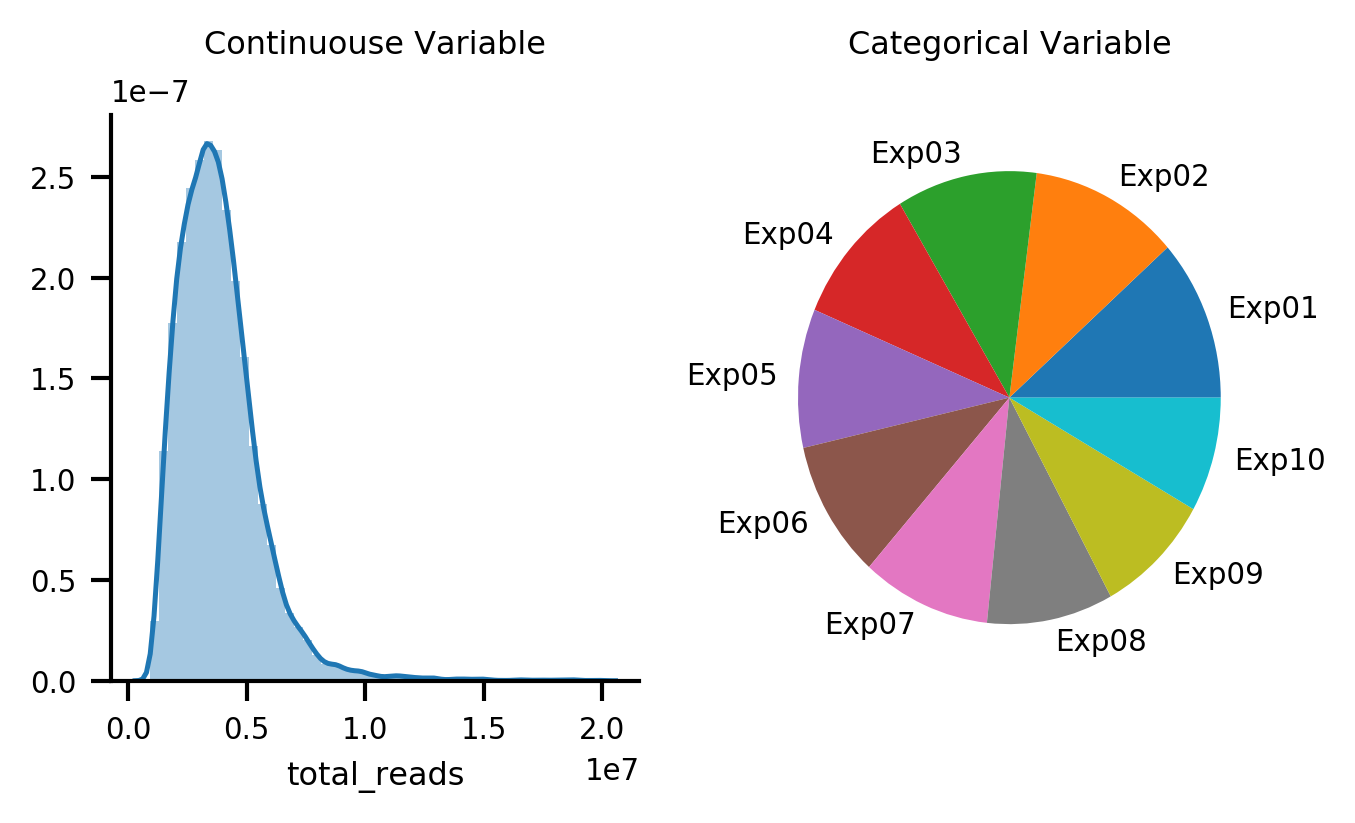

In [6]:
# a typical example of the combination of seaborn and matplotlib

# initialize
fig, ax = plt.subplots(ncols=2)  # plot 2 plots together
ax1, ax2 = ax  # take out 2 axes

# make plots
# pass ax1 to seaborn
sns.distplot(data.total_reads, ax=ax1)
# or use ax2's own function
exp_count = data.experiment.value_counts()
ax2.pie(x=exp_count, labels=exp_count.index)

# Config
fig.set_size_inches(5, 2.5)  # set size
ax1.set_title('Continuouse Variable\n')
ax2.set_title('Categorical Variable\n')
sns.despine(fig=fig)

### 1.5 Matplotlib Basics
#### 1.5.1 Figure and axes (IMPORTANT)
- Easy answer: Figure is main container of axes, axes are like panels of figure. Both are main entrance of custom configs.
- Details: [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), [Axes](https://matplotlib.org/api/axes_api.html) class and abstract base class [Artist](https://matplotlib.org/api/artist_api.html)

<img src="img/figure_axes_axis_labeled.png">

#### \[Not For Today\] 1.5.2 Subplot and GridSpec
- `plt.subplots()`, an easy way to organize multiple axes
- GridSpec and SubplotSpec, a more complex framework to organize axes
- Here is the full tutorial: [Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/tutorials/intermediate/gridspec.html?highlight=gridspec)

#### 1.5.3 Find correct attributes and documentation
- Step 1. Use dir() to check avaliable attr and method
    - try this: 
    ```python 
    dir(ax1)
    dir(None)```

- Step 2. Use doc string of each method, especially convinent in jupyter notebook
    - try this:
    ```python
ax1.pie(# press tab here)
    ```

- Step 3. Search example on google
- Step 4. Use full doc:
[Axes class](https://matplotlib.org/api/axes_api.html)

## 2. Case Study


### 2.1 Variable distribution

### 2.1.1 Single case
Shown in [1.4](#1.4-Types-of-Variable)
- Well, seabor author will [never support pie chart](https://github.com/mwaskom/seaborn/issues/766), but matplotlib does 😂
- For distribution plot, you have more choices [here](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)



### 2.1.2 Multiple case
#### 2.1.2.1 2D

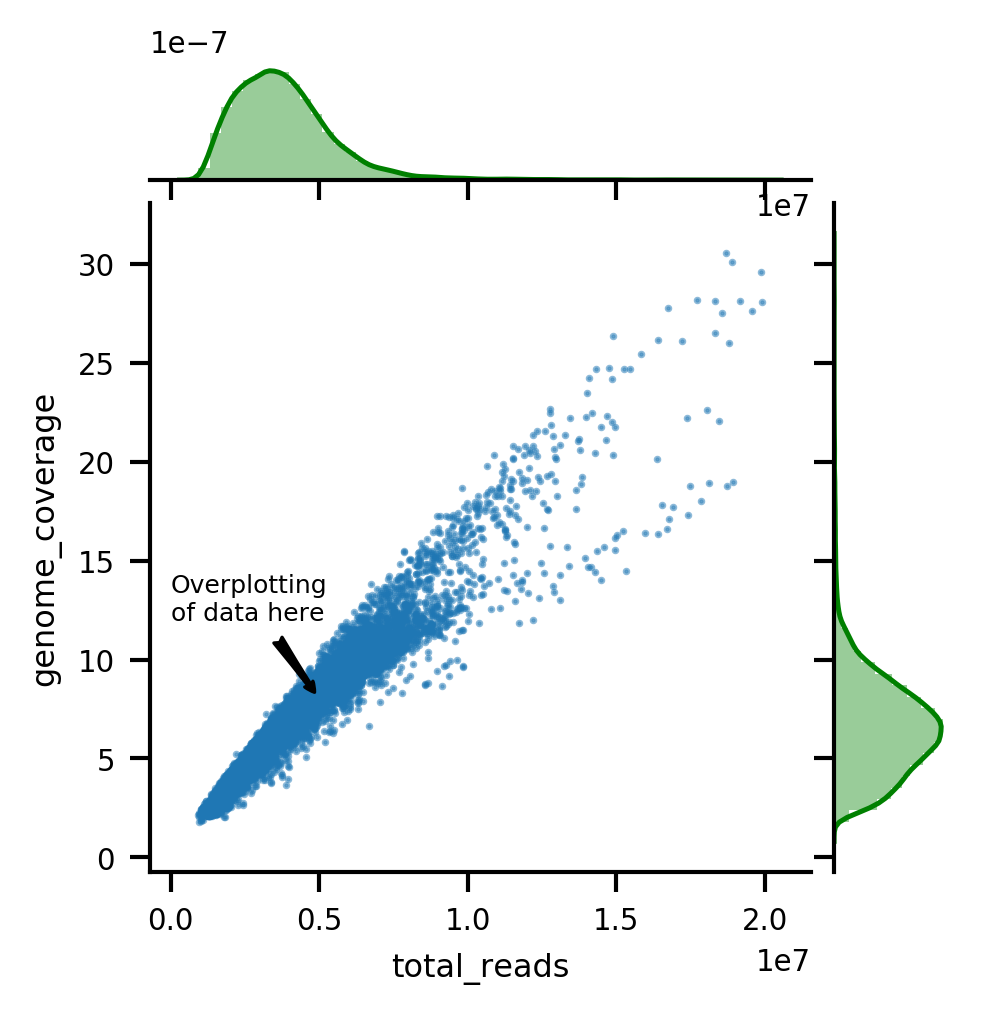

In [7]:
g = sns.jointplot(x='total_reads', y='genome_coverage', data=data,
                  s=1, alpha=0.5, marginal_kws={'kde': True, 'color': 'green'})
# Question: what is g?

# example of customizing axes, which is not in the seaborn doc
g.ax_joint.annotate('Overplotting\nof data here', xy=(5e6, 8), xytext=(0, 12), fontsize=6,
                    arrowprops=dict(facecolor='black', arrowstyle='fancy'))  # this function is matplotlib part, not for today, but try search matplotlib annotate in google
# example of customizing fig
g.fig.set_size_inches(3, 3)

##### JointGrid class of seaborn (IMPORTANT)
- Full doc [here](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)
- `sns.jointplot()` is a Figuer level function, which return JointGrid
- JointGrid contains instance of matplotlib Figure, as well as the 3 Axes in this Figure.
- JointGrid also contains some function to plot on these matplotlib instances
- **Once you get the matplotlib figure or axes, you can customize it anyway you want.**

In [8]:
print(type(g))
# try dir(g), and then you will understand next 2 lines
print(type(g.fig))
print(type(g.ax_joint), type(g.ax_marg_x), type(g.ax_marg_y))

<class 'seaborn.axisgrid.JointGrid'>
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.AxesSubplot'>


##### Figure level vs Axes level functions of seaborn
- After this example, you should understand [this](https://seaborn.pydata.org/introduction.html#intro-func-types)
- Then, you should be able to understand FacetGrid, PairGrid as well.
- That is all 3 multi-plot grids in seaborn, listed [here](https://seaborn.pydata.org/api.html#multi-plot-grids)



#### 2.1.2.2 N-D
- again, you can customize more by getting the fig and ax
- try `g.fig` and `g.axes`
- but if too much custom needed, you'd better use [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) directly
- After this, 

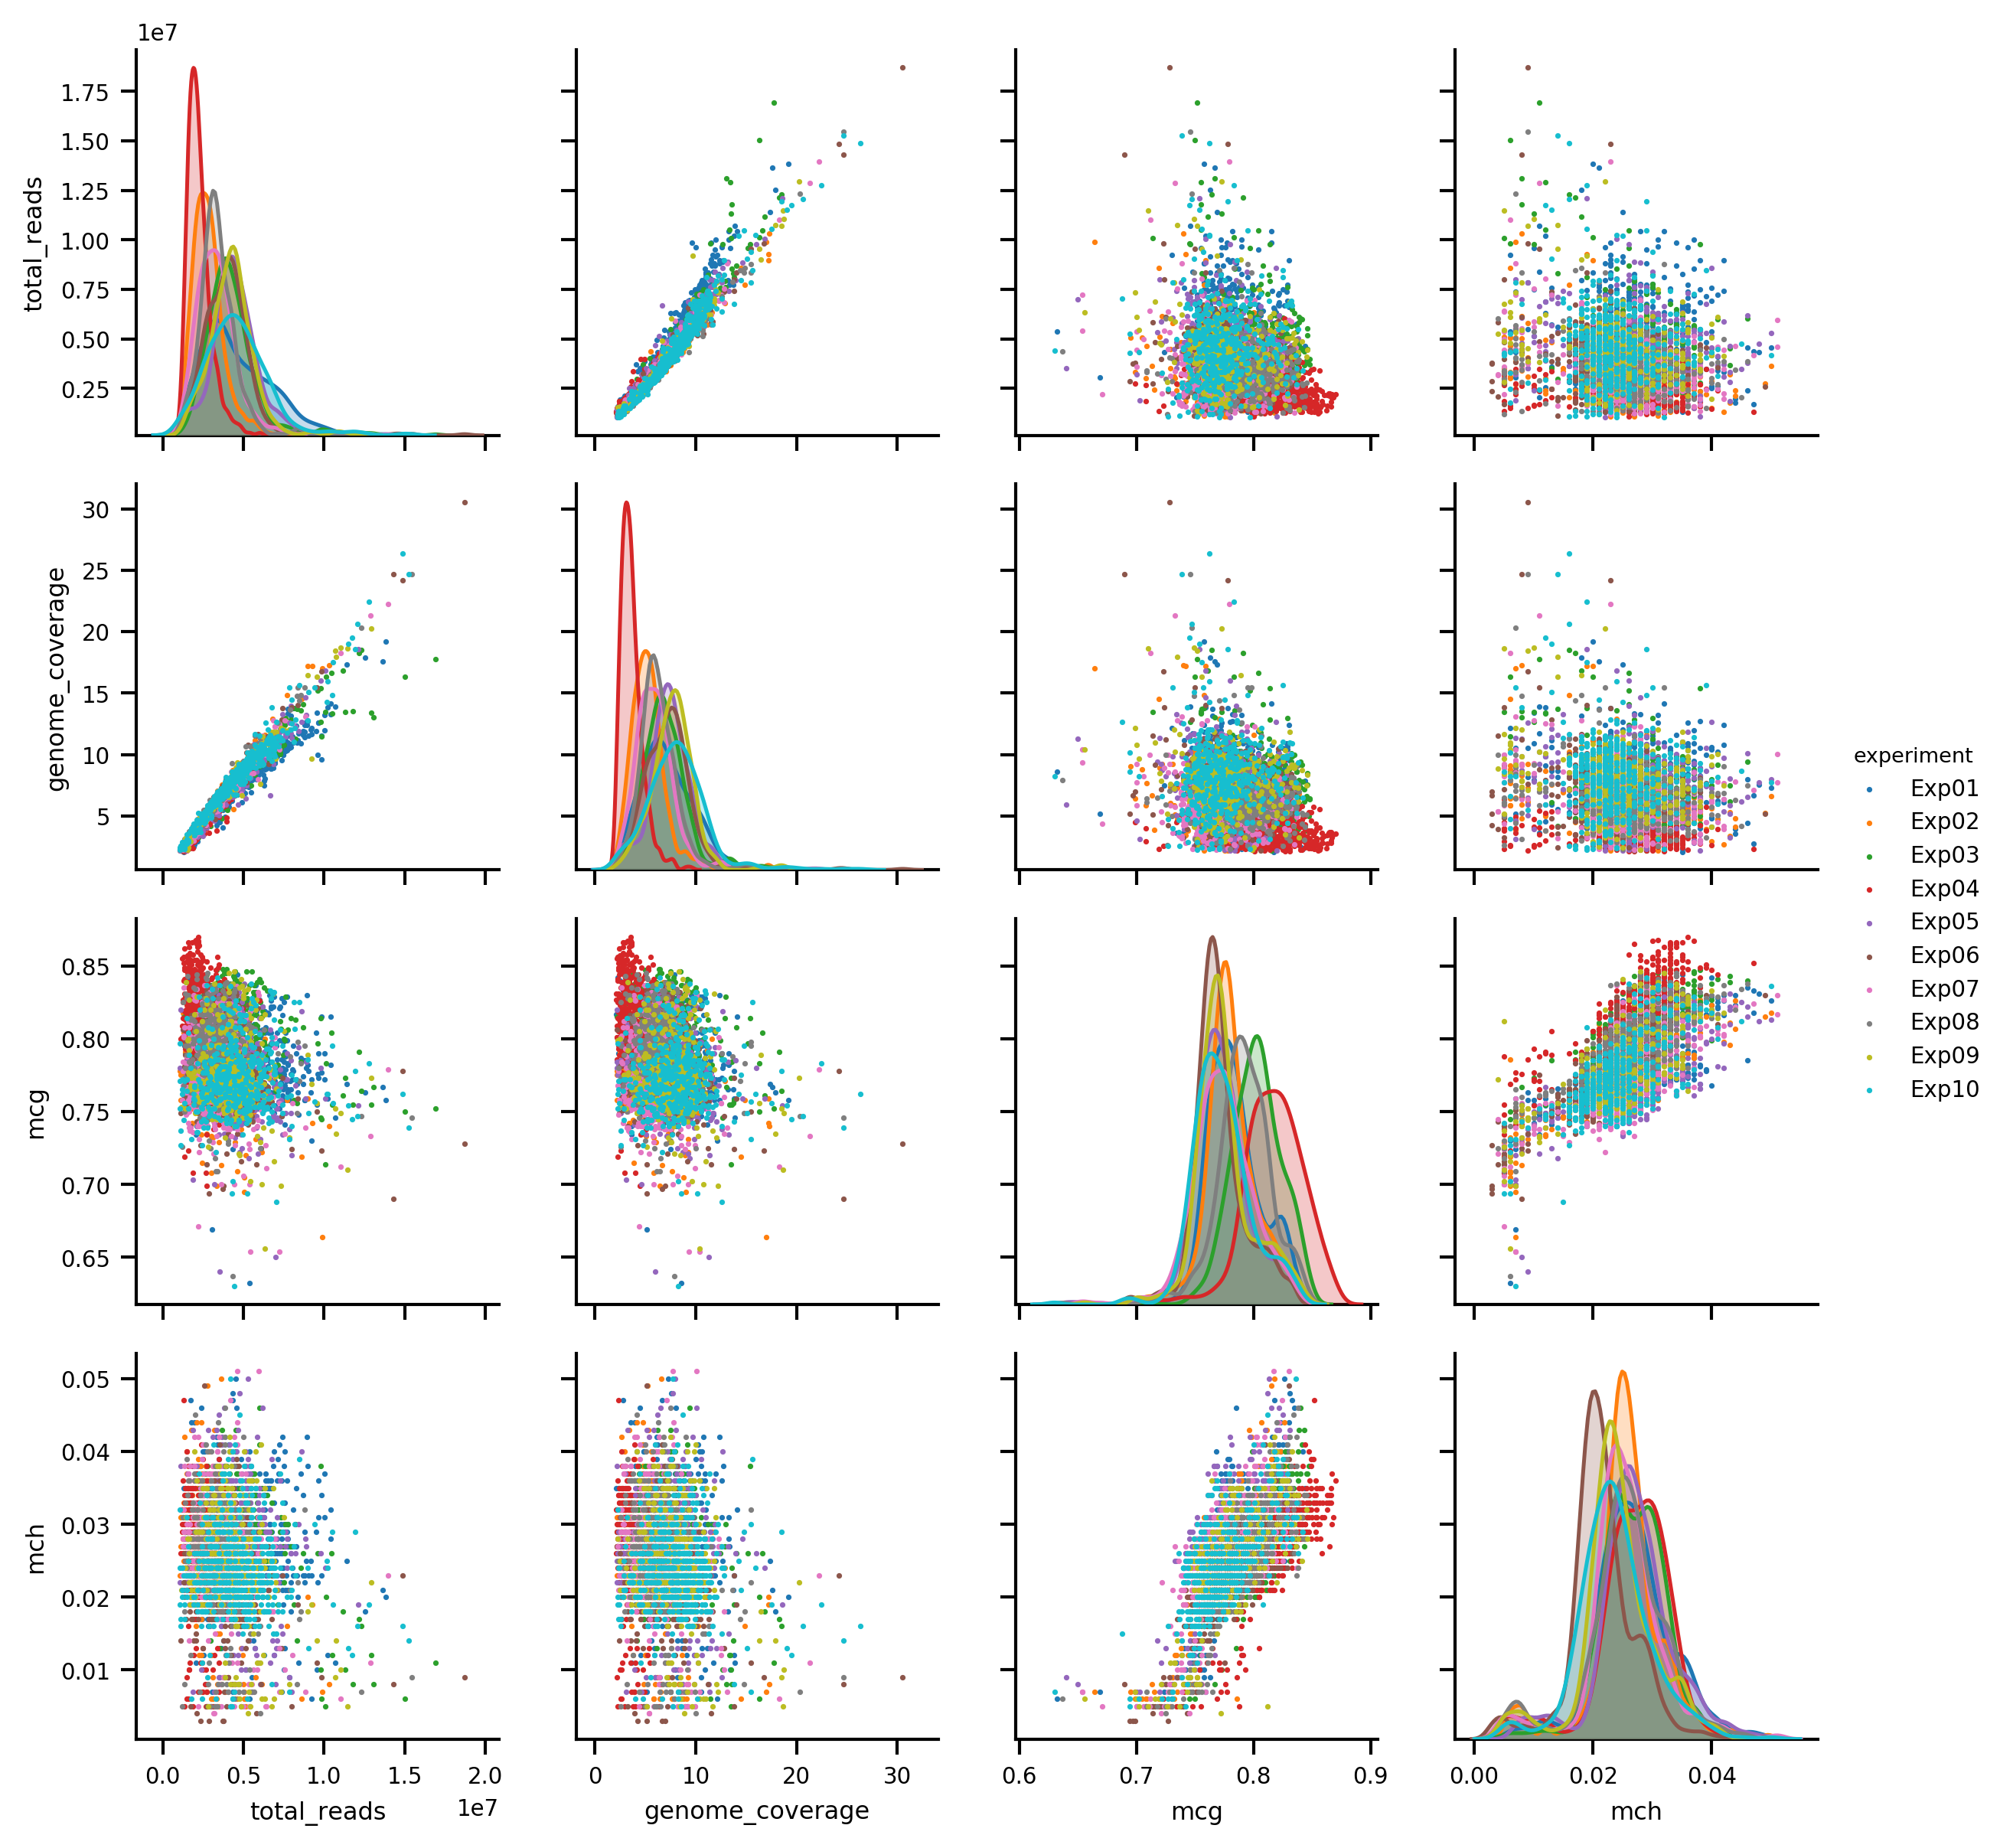

In [9]:
g = sns.pairplot(data=data[['total_reads', 'genome_coverage', 'mcg', 'mch', 'experiment']].sample(5000),  # take variables we are interested
                 hue='experiment', hue_order=sorted(data['experiment'].unique()),  # set hue
                 height=2, plot_kws=dict(s=3, linewidth=0))  # plot adjustment

### 2.2 Variable relationship
#### 2.2.1 Compare based on x, y axis
##### 2.2.1.1 Categorical-Continuous Relationship
See related seaborn tutorial [here](https://seaborn.pydata.org/tutorial/categorical.html)

**Version 1**, What do you get?

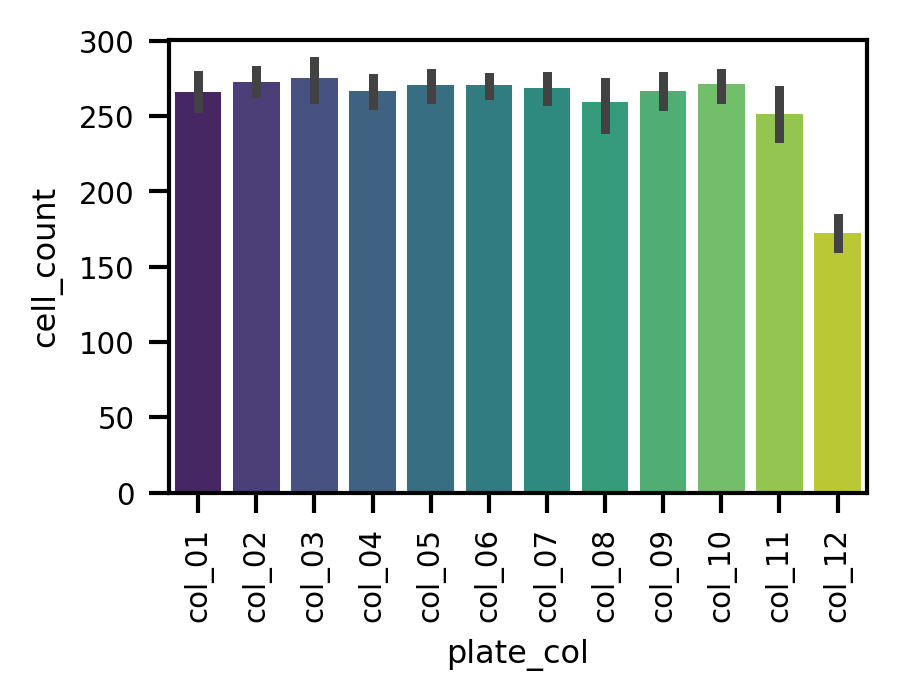

In [10]:
# let's take a look at the cell count table
ax_v1 = sns.barplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis')
ax_v1.tick_params(axis='x', labelrotation=90)

**Version 2**, What do you get?

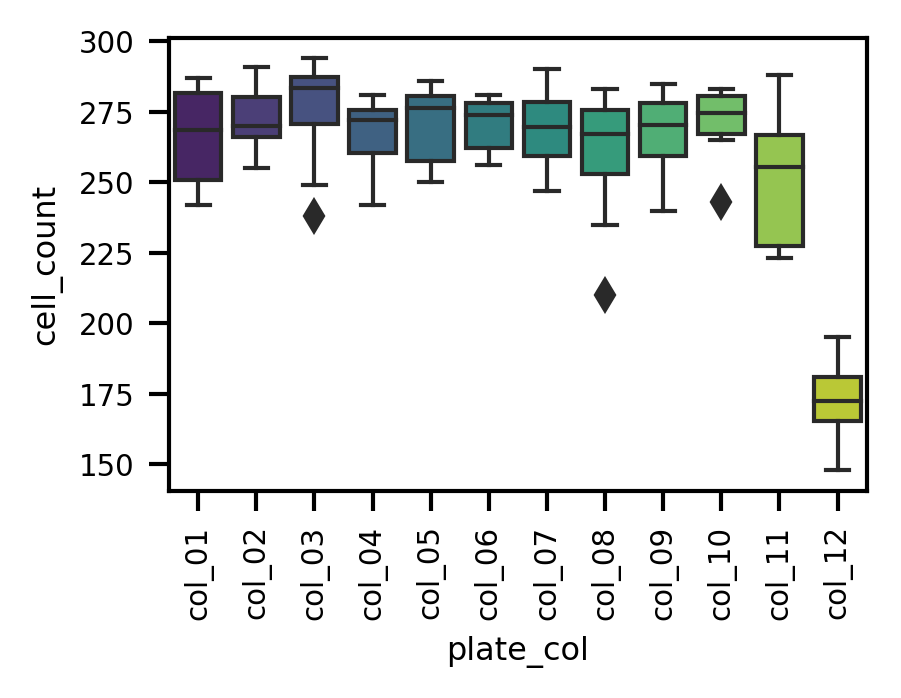

In [11]:
ax_v2 = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1)
ax_v2.tick_params(axis='x', labelrotation=90)

**Version 3**, What do you get?

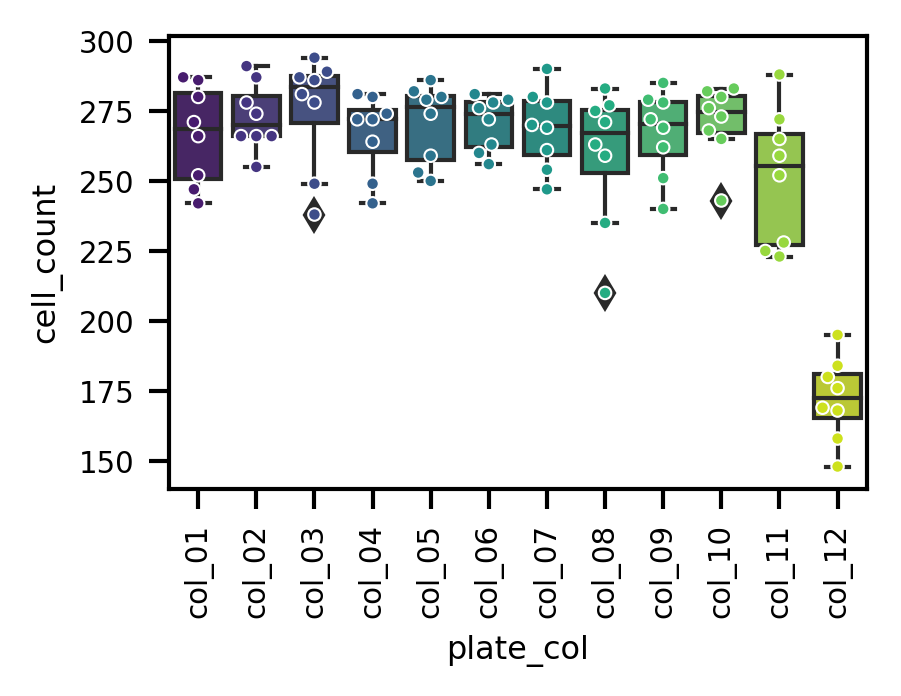

In [12]:
ax_v3 = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, )
ax_v3 = sns.swarmplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white')
ax_v3.tick_params(axis='x', labelrotation=90)

**Version 4**, What do you get?

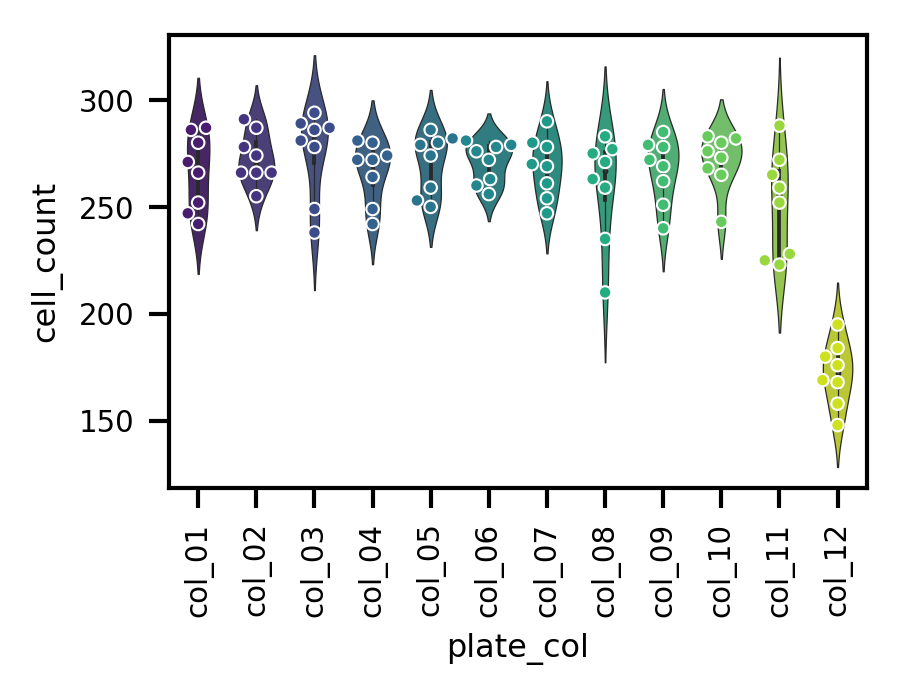

In [13]:
ax_v4 = sns.violinplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.3)
ax_v4 = sns.swarmplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white')
ax_v4.tick_params(axis='x', labelrotation=90)

**Summary**
- Multiple ways exist for categorical data vs continous data
- Select one that can most **faithfully** discribe the real distribution
- Take care about outliers
- Not every distribution is normal distribution
- We saw boxplot all the time, but boxplot may hide some inner wierd (interesting or wrong) distribution
- Sometimes, single points are more important than overall distribution

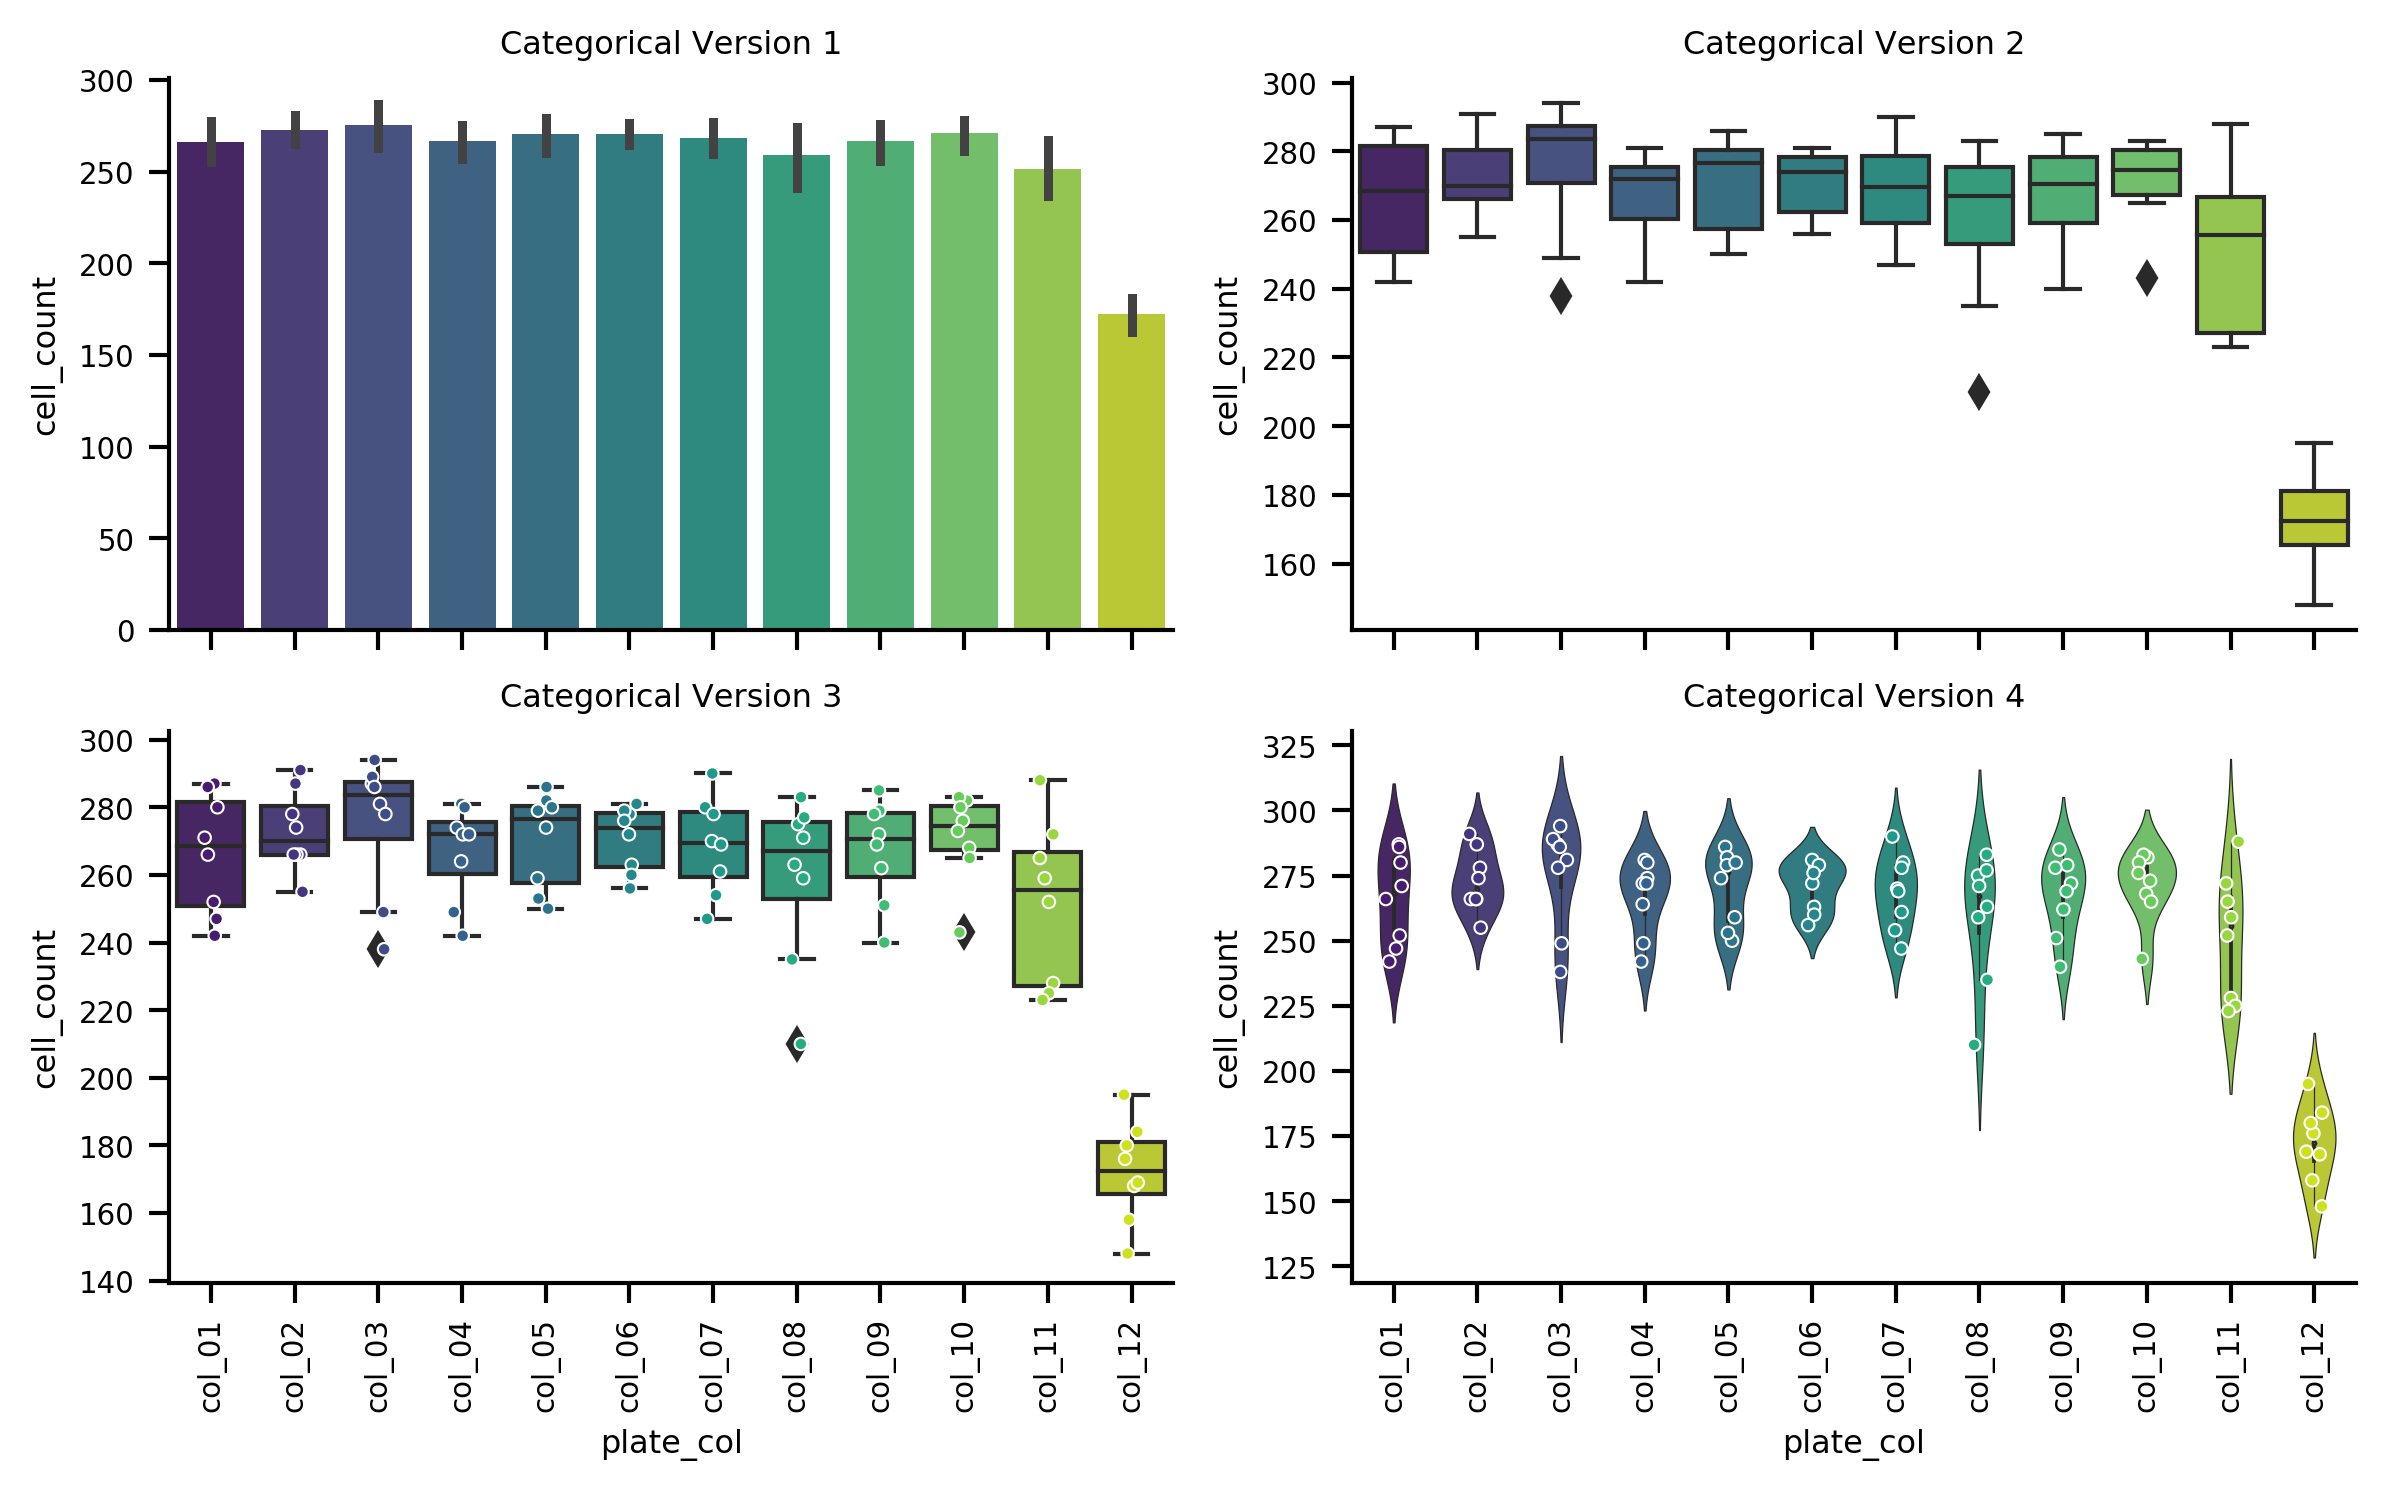

In [14]:
# how to plot together
# 1. get container
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=False)

# 2. plot each
ax = axes[0, 0]
ax = sns.barplot(x='plate_col', y='cell_count', data=tidy_count_table,
                    palette='viridis', ax=ax)
ax = axes[0, 1]
ax = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, ax=ax)
ax = axes[1, 0]
ax = sns.boxplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=1, ax=ax)
ax = sns.stripplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white', ax=ax)
ax = axes[1, 1]
ax = sns.violinplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.3, ax=ax)
ax = sns.stripplot(x='plate_col', y='cell_count', data=tidy_count_table,
                 palette='viridis', linewidth=0.5, s=3, edgecolor='white', ax=ax)

# 3.config
# for each ax
for i, ax in enumerate(np.ravel(axes)):
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(f'Categorical Version {i+1}')
    if i < 2:
        ax.set_xlabel('')
# [(ax.tick_params(axis='x', labelrotation=90), ax.set_title(f'Categorical Version {i+1}'), (ax.set_xlabel('')) if i < 2 else None) for i, ax in enumerate(np.ravel(axes))]

# for fig
fig.set_size_inches(8, 5)
fig.tight_layout()
sns.despine(fig=fig)

##### 2.2.1.2 Categorical-Categorical Relationship

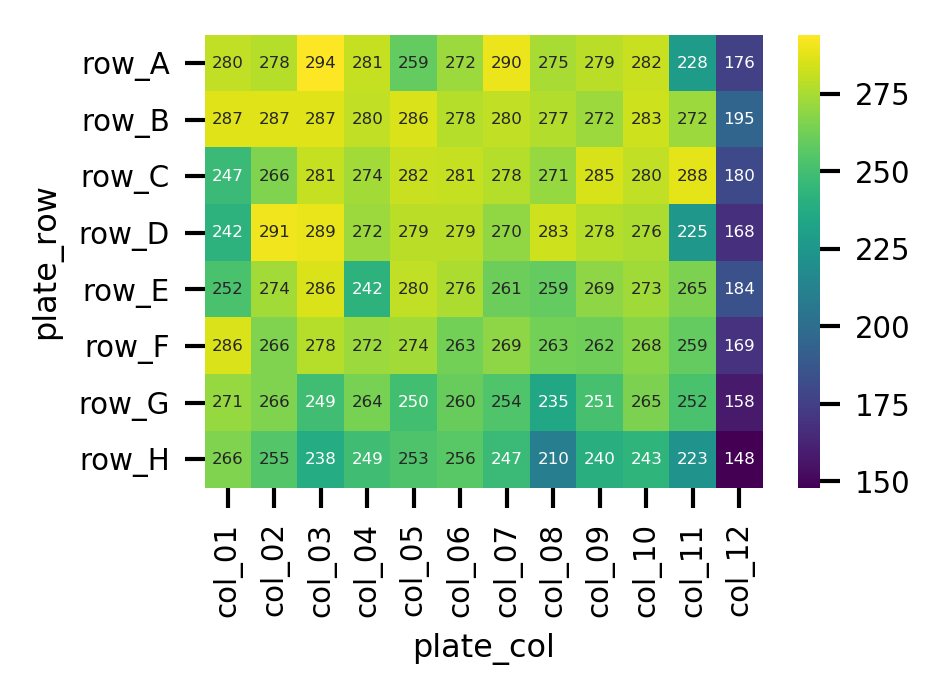

In [15]:
ax = sns.heatmap(non_tidy_count_table, cmap='viridis',
                 annot=True, fmt='2d', annot_kws=dict(fontsize=4))

A more fancy example from [this nature genetics paper](https://www.nature.com/articles/ng.3406#results)
<img src="https://media.nature.com/lw926/nature-assets/ng/journal/v47/n11/images/ng.3406-F2.jpg">

In [16]:
trait_select = ['Ever/Never Smoked', 'BMI', 'Childhood Obesity', 
                'Fasting Glucose', 'T2D', 'Coronary Artery Disease', 
                'LDL', 'Triglycerides', 'Rheumatoid Arthritis', 
                "Alzheimer's", 'Age at Menarche', 'HDL', "Crohn's Disease", 
                'Ulcerative Colitis', 'Height', 'Infant Head Circumference', 
                'Birth Length', 'Birth Weight', 'Autism Spectrum', 'Years of Education', 
                'Anorexia', 'Depression', 'Bipolar', 'Schizophrenia']

# Data cleaning is not intend for today... Just show the process for integraty.
fancy_data = pd.read_csv('fancy_heatmap_data.csv')
fancy_data_r = fancy_data[['Trait2', 'Trait1', 'rg', 'se', 'z', 'p']]
fancy_data_r.columns = ['Trait1', 'Trait2', 'rg', 'se', 'z', 'p']
fancy_data_diag = pd.DataFrame([[trait, trait, 1, 999, 999, 0] for trait in trait_select],
                               columns=['Trait1', 'Trait2', 'rg', 'se', 'z', 'p'])
fancy_data = pd.concat([fancy_data, fancy_data_r, fancy_data_diag], ignore_index=True)
trait_select_r = trait_select[::-1]
fancy_data = fancy_data[fancy_data['Trait1'].isin(trait_select) & fancy_data['Trait2'].isin(trait_select)]
from math import log10
fancy_data['-lgp'] = fancy_data['p'].apply(lambda i: -log10(i) if i != 0 else 999)

fancy_data['x'] = fancy_data['Trait1'].apply(lambda i: trait_select.index(i))
fancy_data['y'] = fancy_data['Trait2'].apply(lambda i: trait_select_r.index(i))

fancy_data.head()

Trait1           Trait2     rg       se       z             p  \
49  Age at Menarche      Alzheimer's -0.016  0.06840  -0.236  8.134000e-01   
50  Age at Menarche         Anorexia  0.026  0.04347   0.605  5.452000e-01   
51  Age at Menarche  Autism Spectrum -0.107  0.06001  -1.782  7.472000e-02   
52  Age at Menarche              BMI -0.318  0.02178 -14.615  2.253000e-48   
54  Age at Menarche          Bipolar  0.032  0.04671   0.680  4.967000e-01   

         -lgp   x   y  
49   0.089696  10  14  
50   0.263444  10   3  
51   1.126563  10   5  
52  47.647239  10  22  
54   0.303906  10   1

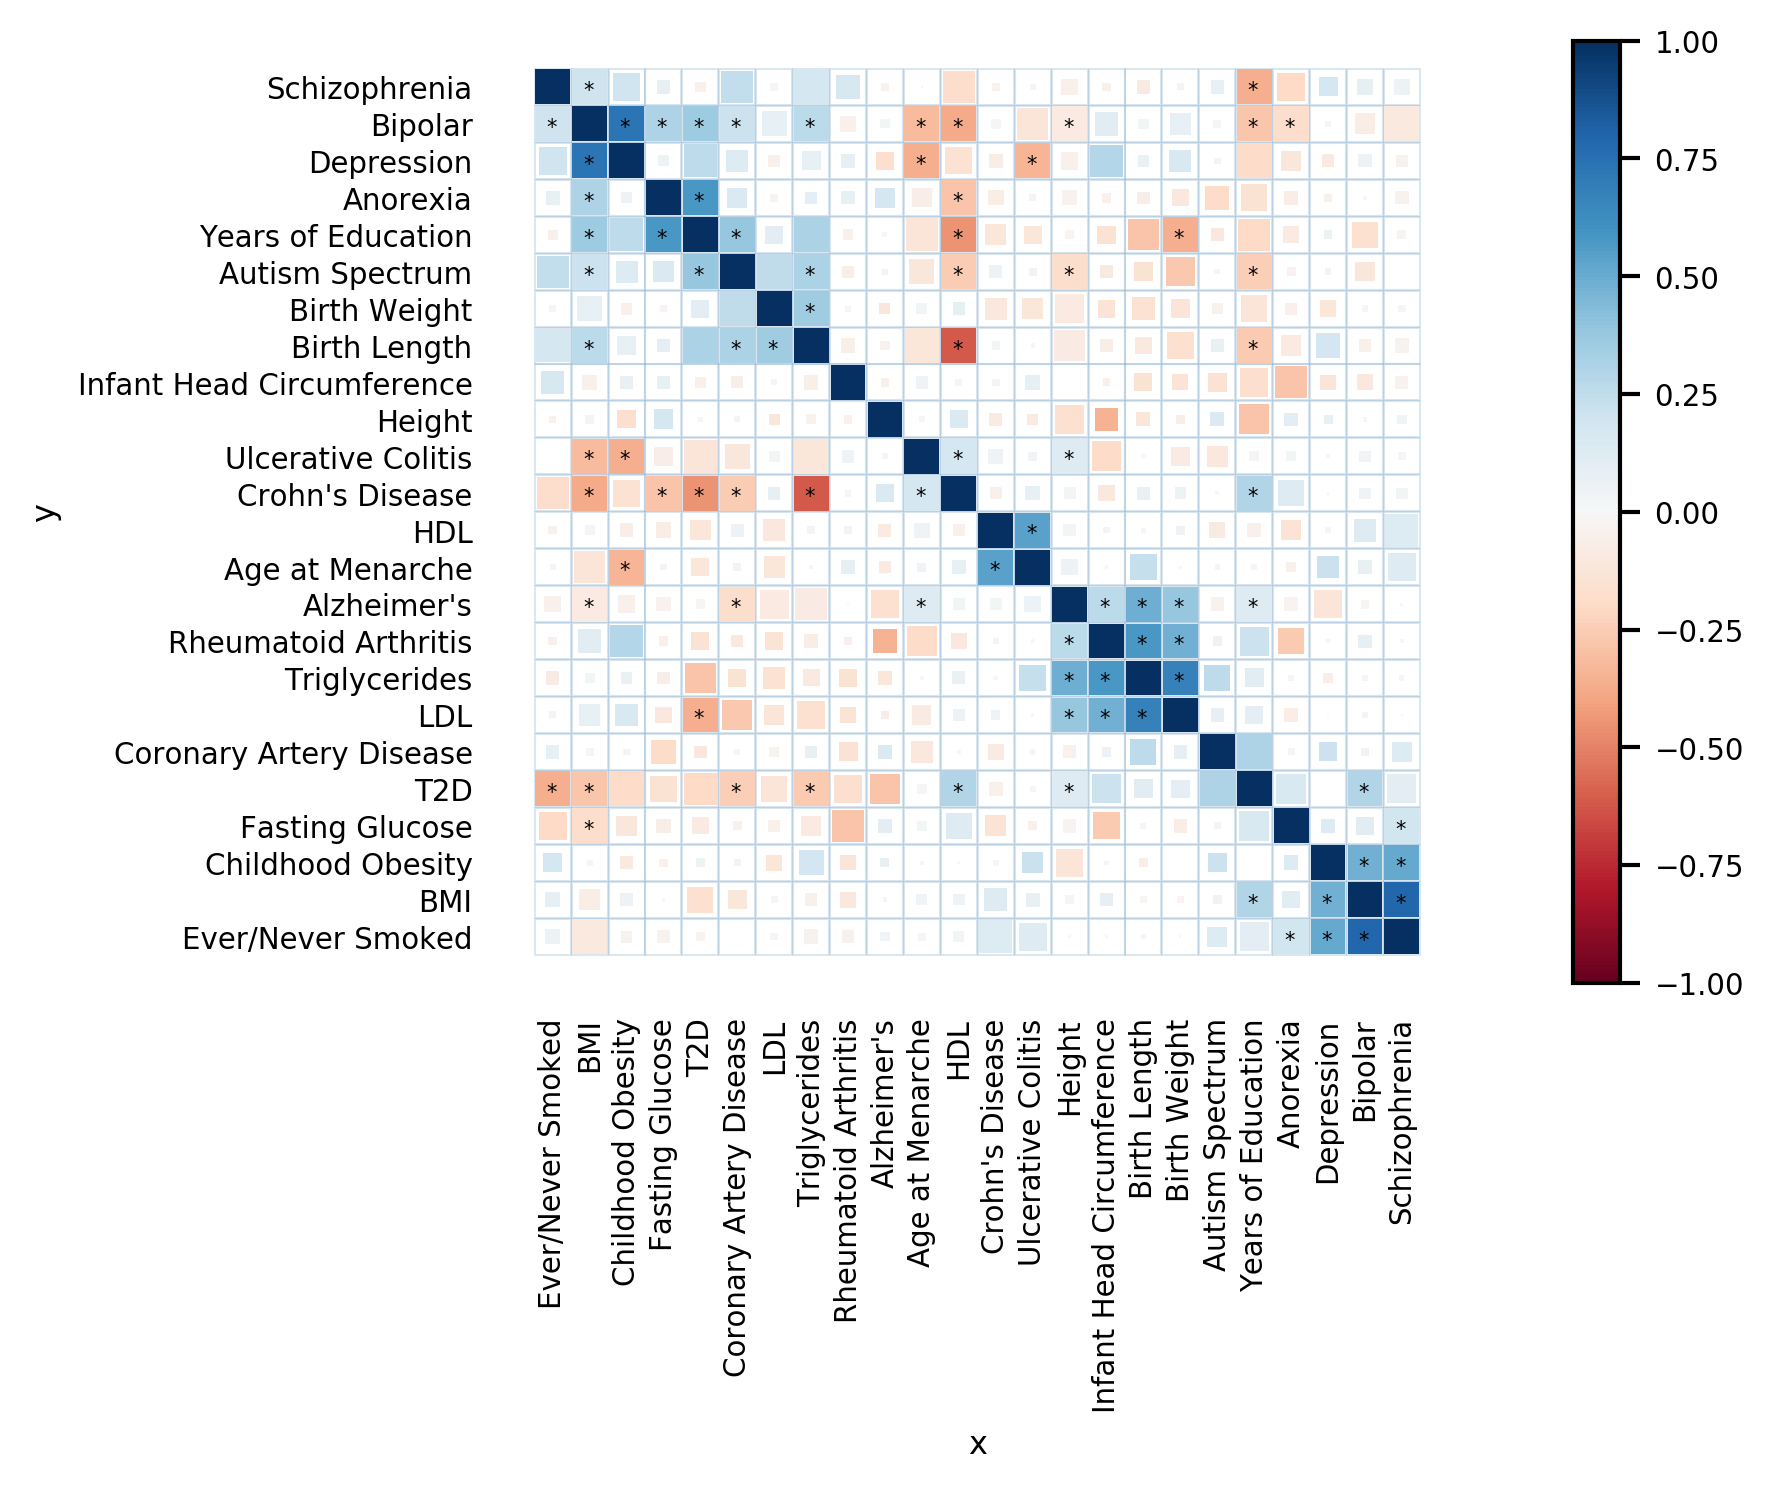

In [17]:
# NOTE: This is just a simple reproduce, not intend to discuss statistics... 
fig, ax = plt.subplots()
fig.set_size_inches(6, 5)

# draw some grid by myself (or you can use matplotlib's grid)
sns.scatterplot(x='x', y='y', data=fancy_data, # basic coord
                s=75, marker='s', color='white', alpha=0.2, linewidth=0.5, edgecolor='steelblue', legend=False, ax=ax)

sns.scatterplot(x='x', y='y', data=fancy_data, # basic coord
                size='-lgp', size_norm=(0, 3), sizes=(0, 70),
                hue='rg', hue_norm=(-1, 1), palette='RdBu', 
                marker='s', linewidth=0, legend=False)

# customize xaxis
ax.xaxis.set_ticks(ticks=range(len(trait_select)))
ax.xaxis.set_ticklabels(trait_select)
ax.xaxis.set_tick_params(width=0)
ax.tick_params(axis='x', labelrotation=90)

# customize yaxis
ax.yaxis.set_ticks(ticks=range(len(trait_select)))
ax.yaxis.set_ticklabels(trait_select)
ax.yaxis.set_tick_params(width=0)

# add asterisk for significant points
for i, row in fancy_data.iterrows():
    if (row['-lgp'] > 3.76) and (row['x'] != len(trait_select) - row['y'] - 1):
        ax.text(x=row['x']-0.18, y=row['y']-0.25, s='*', fontsize=5)

# Draw the colorbar
points = plt.scatter([], [], c=[], vmin=-1, vmax=1, cmap='RdBu')
fig.colorbar(points, pad=0.1)

sns.despine(fig=fig, top=True, bottom=True, left=True, right=True)
fig.tight_layout()
fig.savefig('img/fancy_heatmap.svg')

##### 2.2.1.3 Continuous-Continuous Relationship

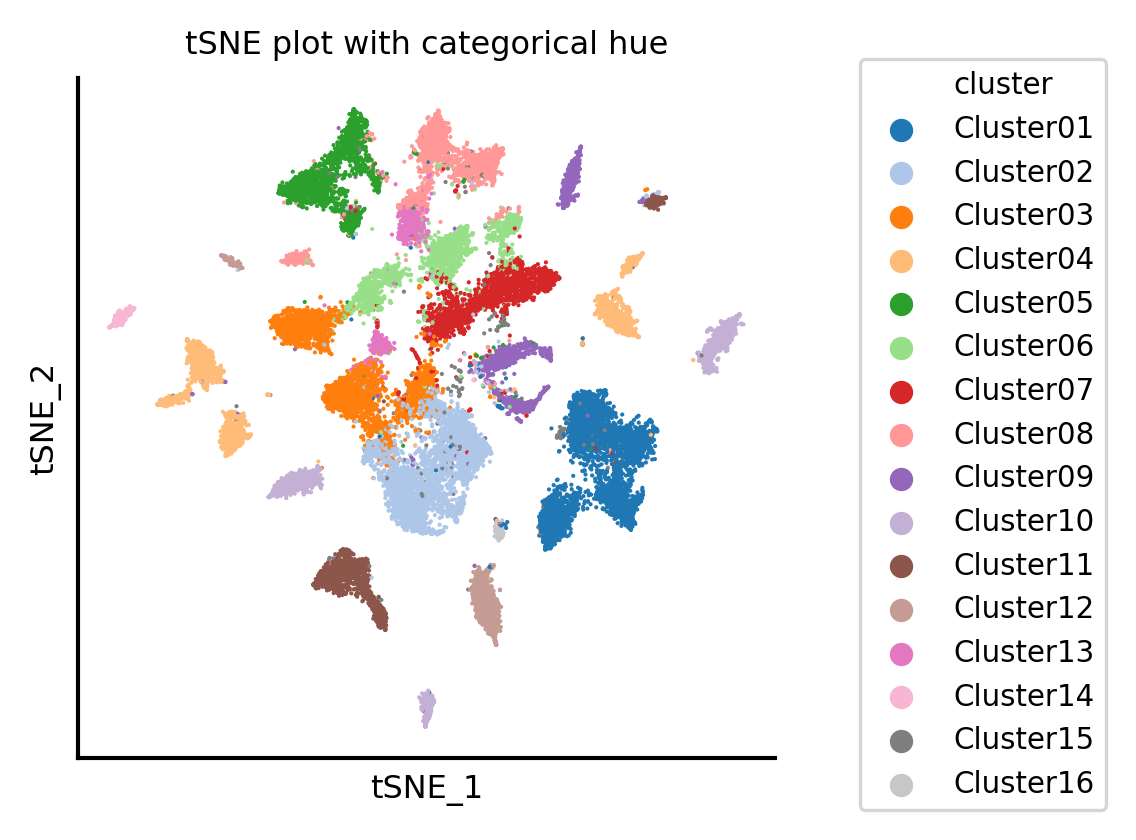

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)

sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='cluster', hue_norm=(-1, 1), hue_order=sorted(data['cluster'].unique()), palette='tab20',
                linewidth=0, s=1)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_title('tSNE plot with categorical hue')
sns.despine(fig=fig)

#cluster_center = data.groupby('cluster').apply(lambda i: i[['tSNE_1', 'tSNE_2']].mean())
#for i, row in cluster_center.iterrows():
#    ax.text(x=row['tSNE_1'], y=row['tSNE_2'], s=i[-2:], fontsize=4)

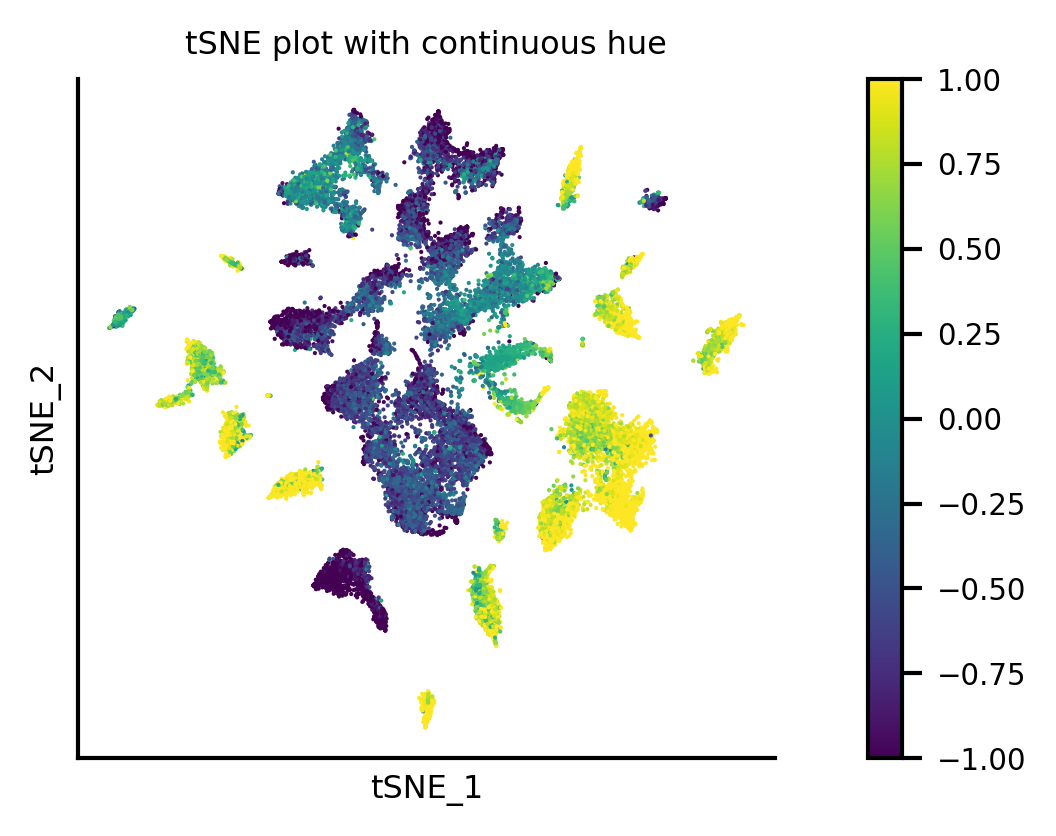

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)

sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='gene2', hue_norm=(-1, 1), palette='viridis',
                linewidth=0, s=1, legend=False)
# Draw the colorbar
points = plt.scatter([], [], c=[], vmin=-1, vmax=1, cmap='viridis')
fig.colorbar(points, pad=0.1)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_title('tSNE plot with continuous hue')
sns.despine(fig=fig)

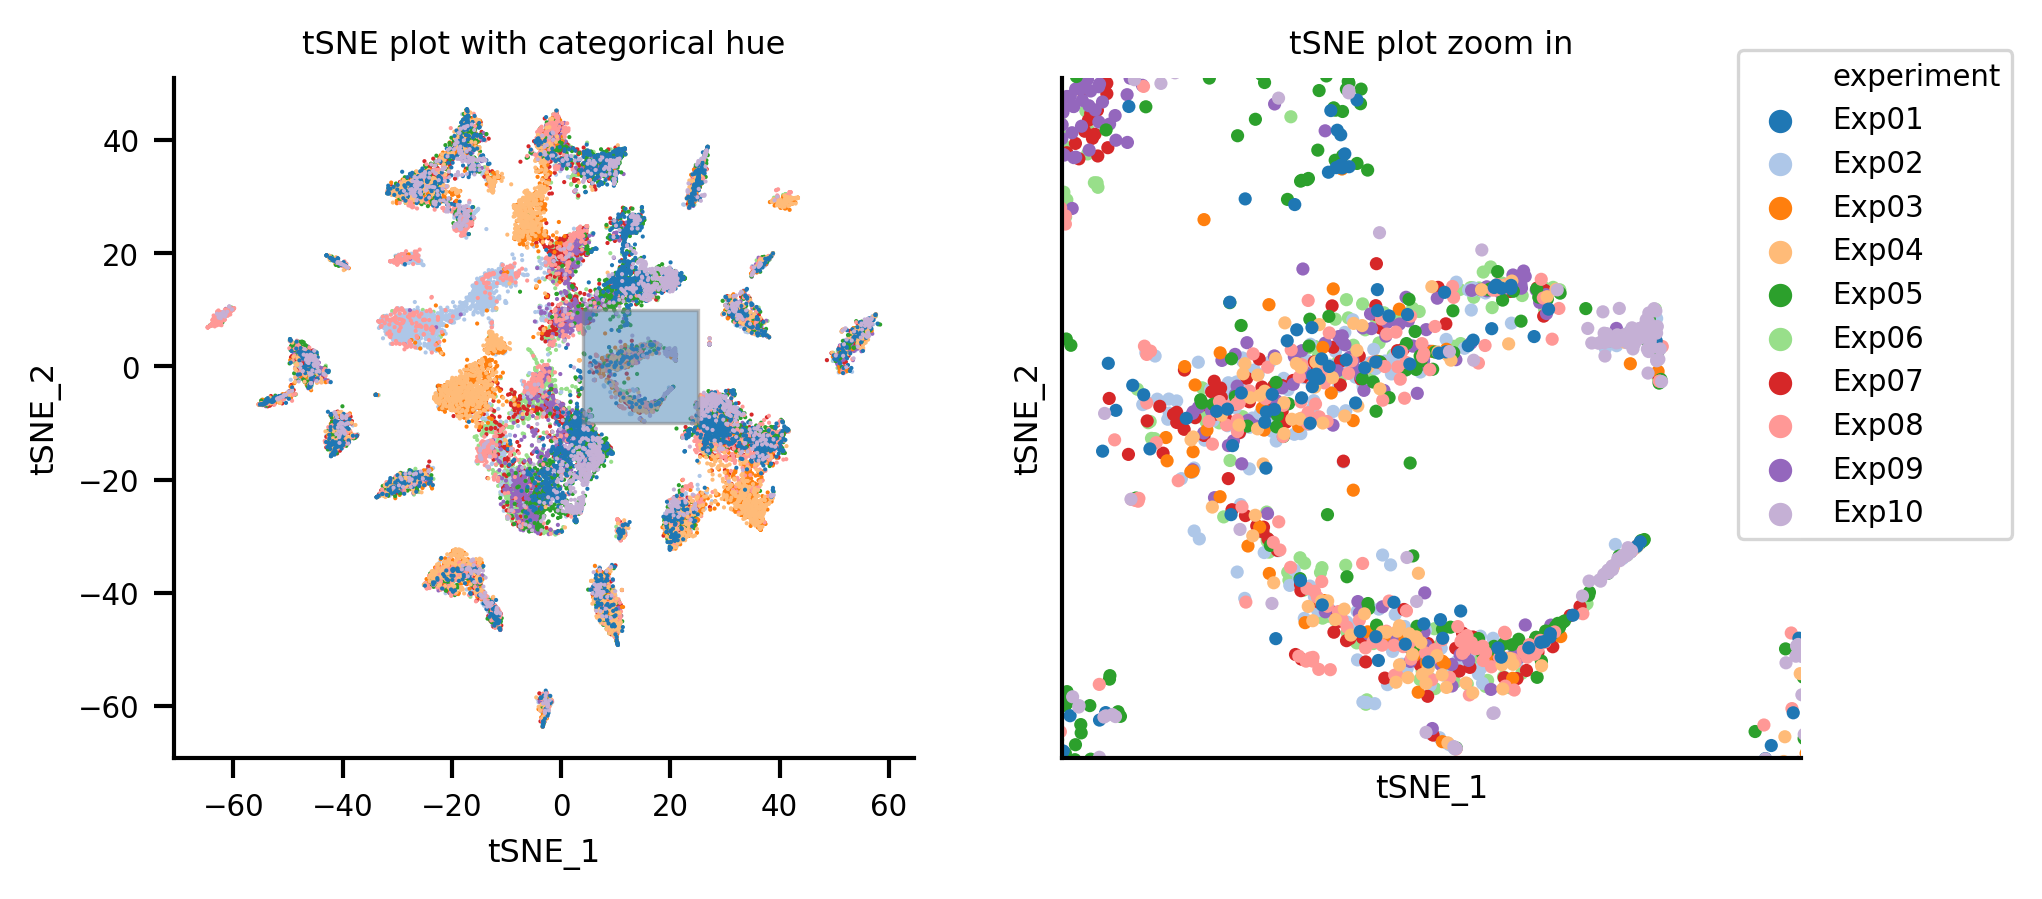

In [20]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(7, 3)

ax=axes[0]
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='experiment', hue_norm=(-1, 1), hue_order=sorted(data['experiment'].unique()), palette='tab20',
                linewidth=0, s=1, ax=ax, legend=False)
# look at this if you want a fancy box annotation 
# https://matplotlib.org/gallery/text_labels_and_annotations/demo_annotation_box.html
x = [4, 25, 25, 4]
y = [-10, -10, 10, 10]
ax.fill(x, y, facecolor='steelblue', edgecolor='grey', alpha=0.5)
ax.set_title('tSNE plot with categorical hue')

ax=axes[1]
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='experiment', hue_norm=(-1, 1), hue_order=sorted(data['experiment'].unique()), palette='tab20',
                linewidth=0, s=10, ax=ax)
ax.legend(bbox_to_anchor=(1.1, 0.3))
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_xlim(4, 25)
ax.set_ylim(-10, 10)
ax.set_title('tSNE plot zoom in')
sns.despine(fig=fig)

#### 2.2.2 Compare other than x, y axis
##### 2.2.2.1 Visual code
- See the examples above
- Color, color, color
    - [Seaborn color part](https://seaborn.pydata.org/tutorial/color_palettes.html)
    - [Matplotlib color part](https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py)

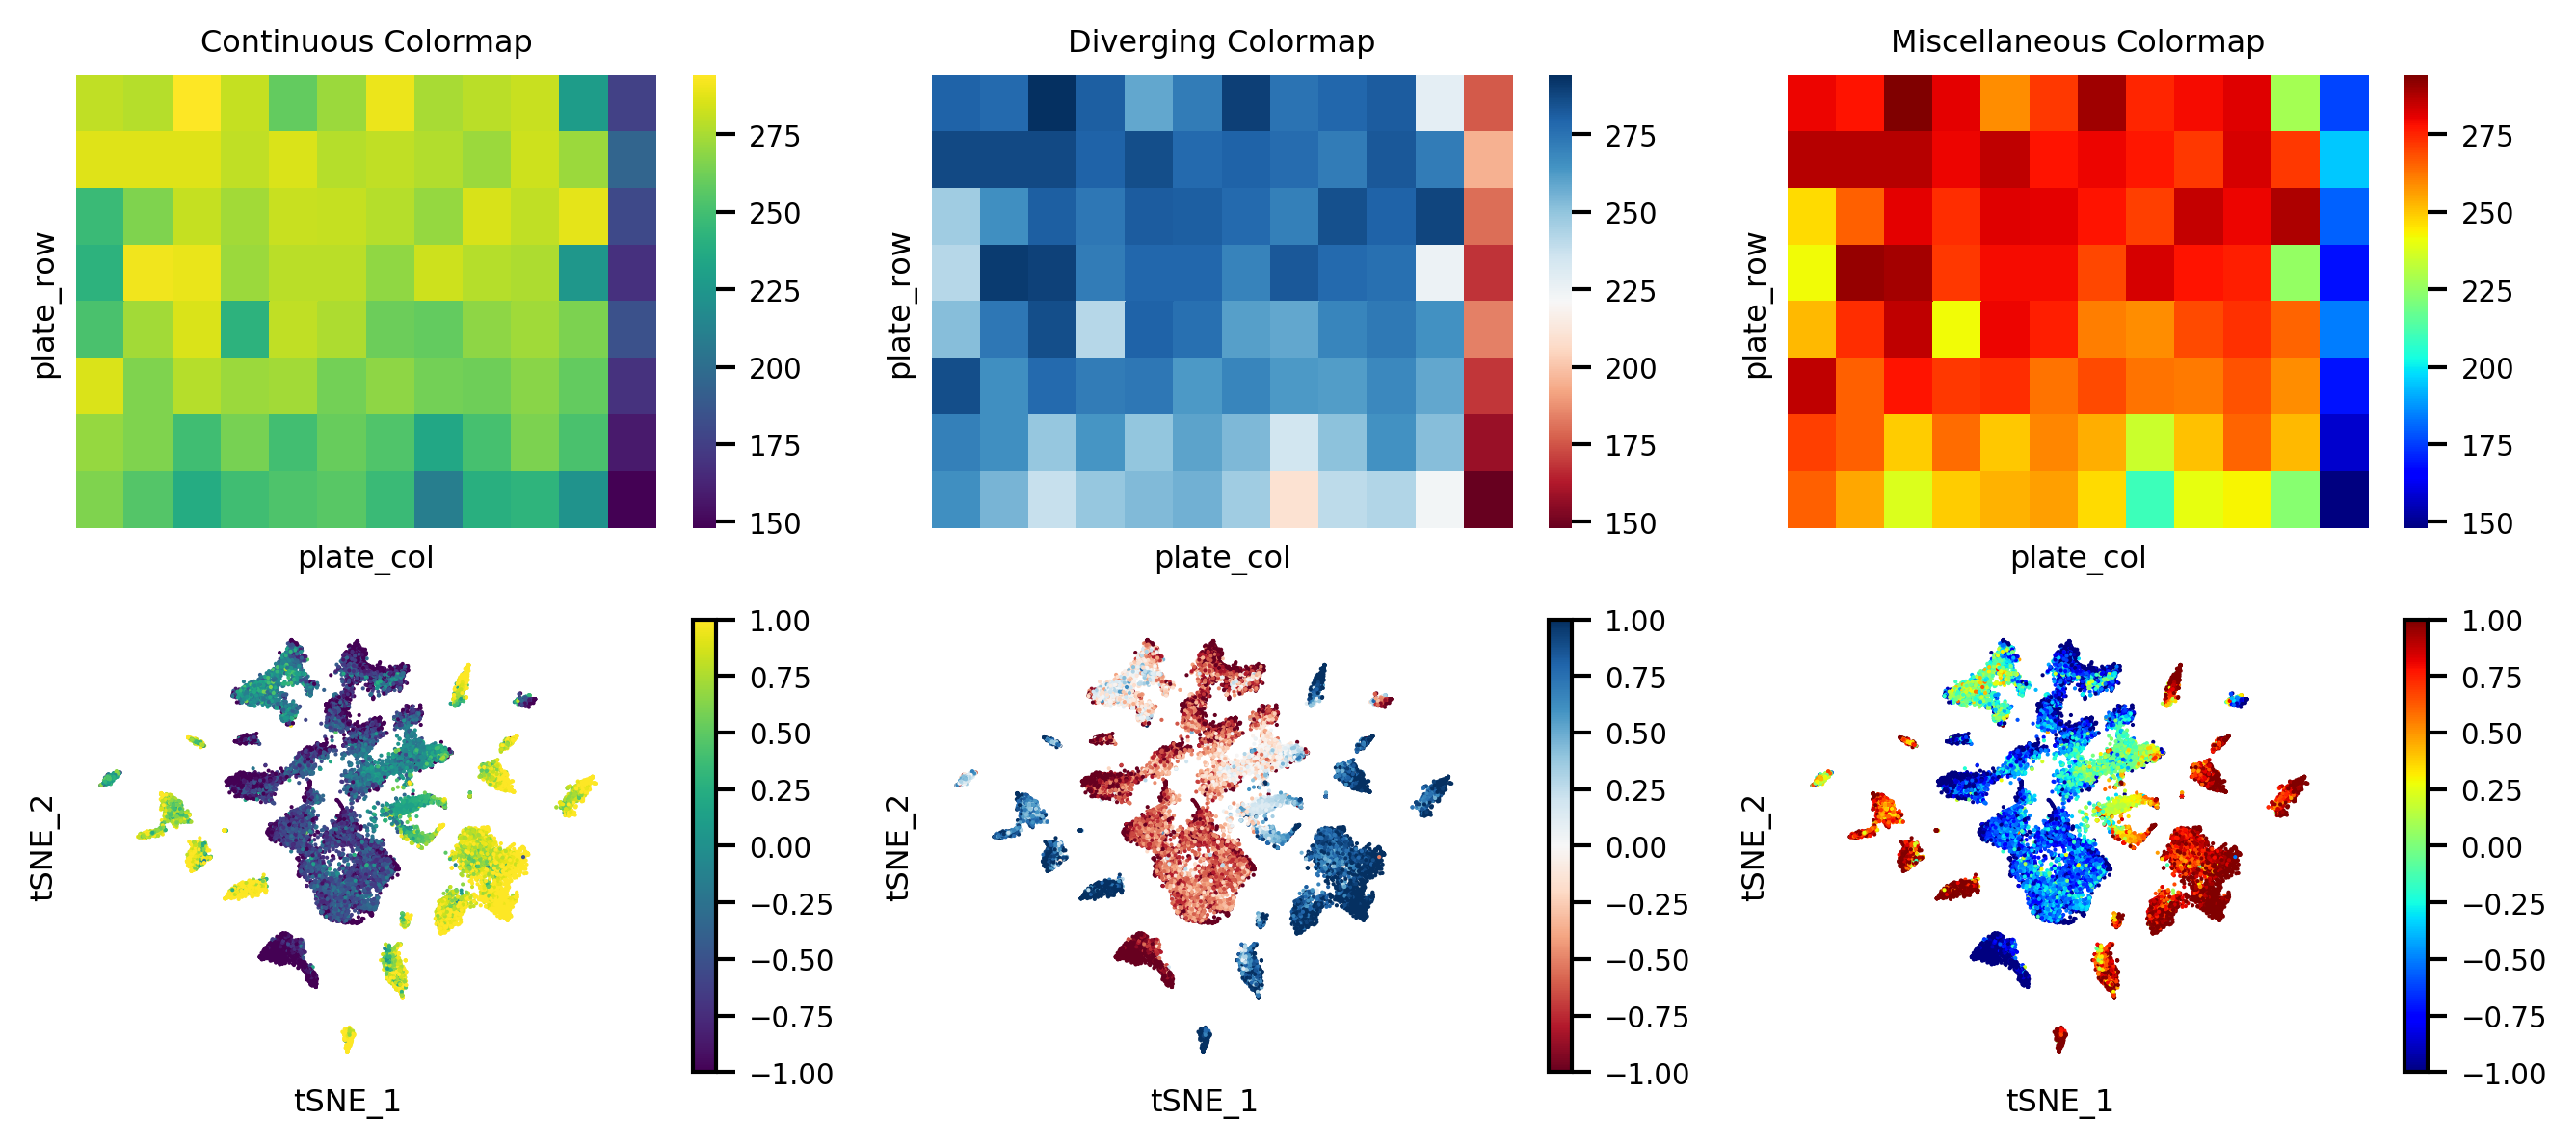

In [21]:
fig, axes = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(9, 4)
ax = axes[0, 0]
sns.heatmap(non_tidy_count_table, cmap='viridis', ax=ax)
ax.set_title('Continuous Colormap')
ax = axes[0, 1]
sns.heatmap(non_tidy_count_table, cmap='RdBu', ax=ax)
ax.set_title('Diverging Colormap')
ax = axes[0, 2]
sns.heatmap(non_tidy_count_table, cmap='jet', ax=ax)
ax.set_title('Miscellaneous Colormap')

ax = axes[1, 0]
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='gene2', hue_norm=(-1, 1), palette='viridis',
                linewidth=0, s=1, legend=False, ax=ax)
# Draw the colorbar
points = plt.scatter([], [], c=[], vmin=-1, vmax=1, cmap='viridis')
fig.colorbar(points, pad=0.1, ax=ax)


ax = axes[1, 1]
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='gene2', hue_norm=(-1, 1), palette='RdBu',
                linewidth=0, s=1, legend=False, ax=ax)
# Draw the colorbar
points = plt.scatter([], [], c=[], vmin=-1, vmax=1, cmap='RdBu')
fig.colorbar(points, pad=0.1, ax=ax)


ax = axes[1, 2]
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, 
                hue='gene2', hue_norm=(-1, 1), palette='jet',
                linewidth=0, s=1, legend=False, ax=ax)
# Draw the colorbar
points = plt.scatter([], [], c=[], vmin=-1, vmax=1, cmap='jet')
fig.colorbar(points, pad=0.1, ax=ax)
for ax in np.ravel(axes):
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
sns.despine(fig=fig, bottom=True, left=True)
fig.tight_layout()

In [22]:
# see what seaborn author say about jet
try:
    sns.color_palette('jet')
except ValueError as e:
    print(e)

No.


##### 2.2.2.2 [Small multiple](https://seaborn.pydata.org/tutorial/axis_grids.html)
- Compare the bellow on with [above](#2.2.1.2-Categorical-Categorical-Relationship)

In [23]:
def make_plate_count(df):
    return df.groupby(['plate_col', 'plate_row'])\
             .apply(lambda i: i.shape[0])\
             .unstack().T.fillna(0)
palte_count_by_exp = data.groupby('experiment').apply(make_plate_count)

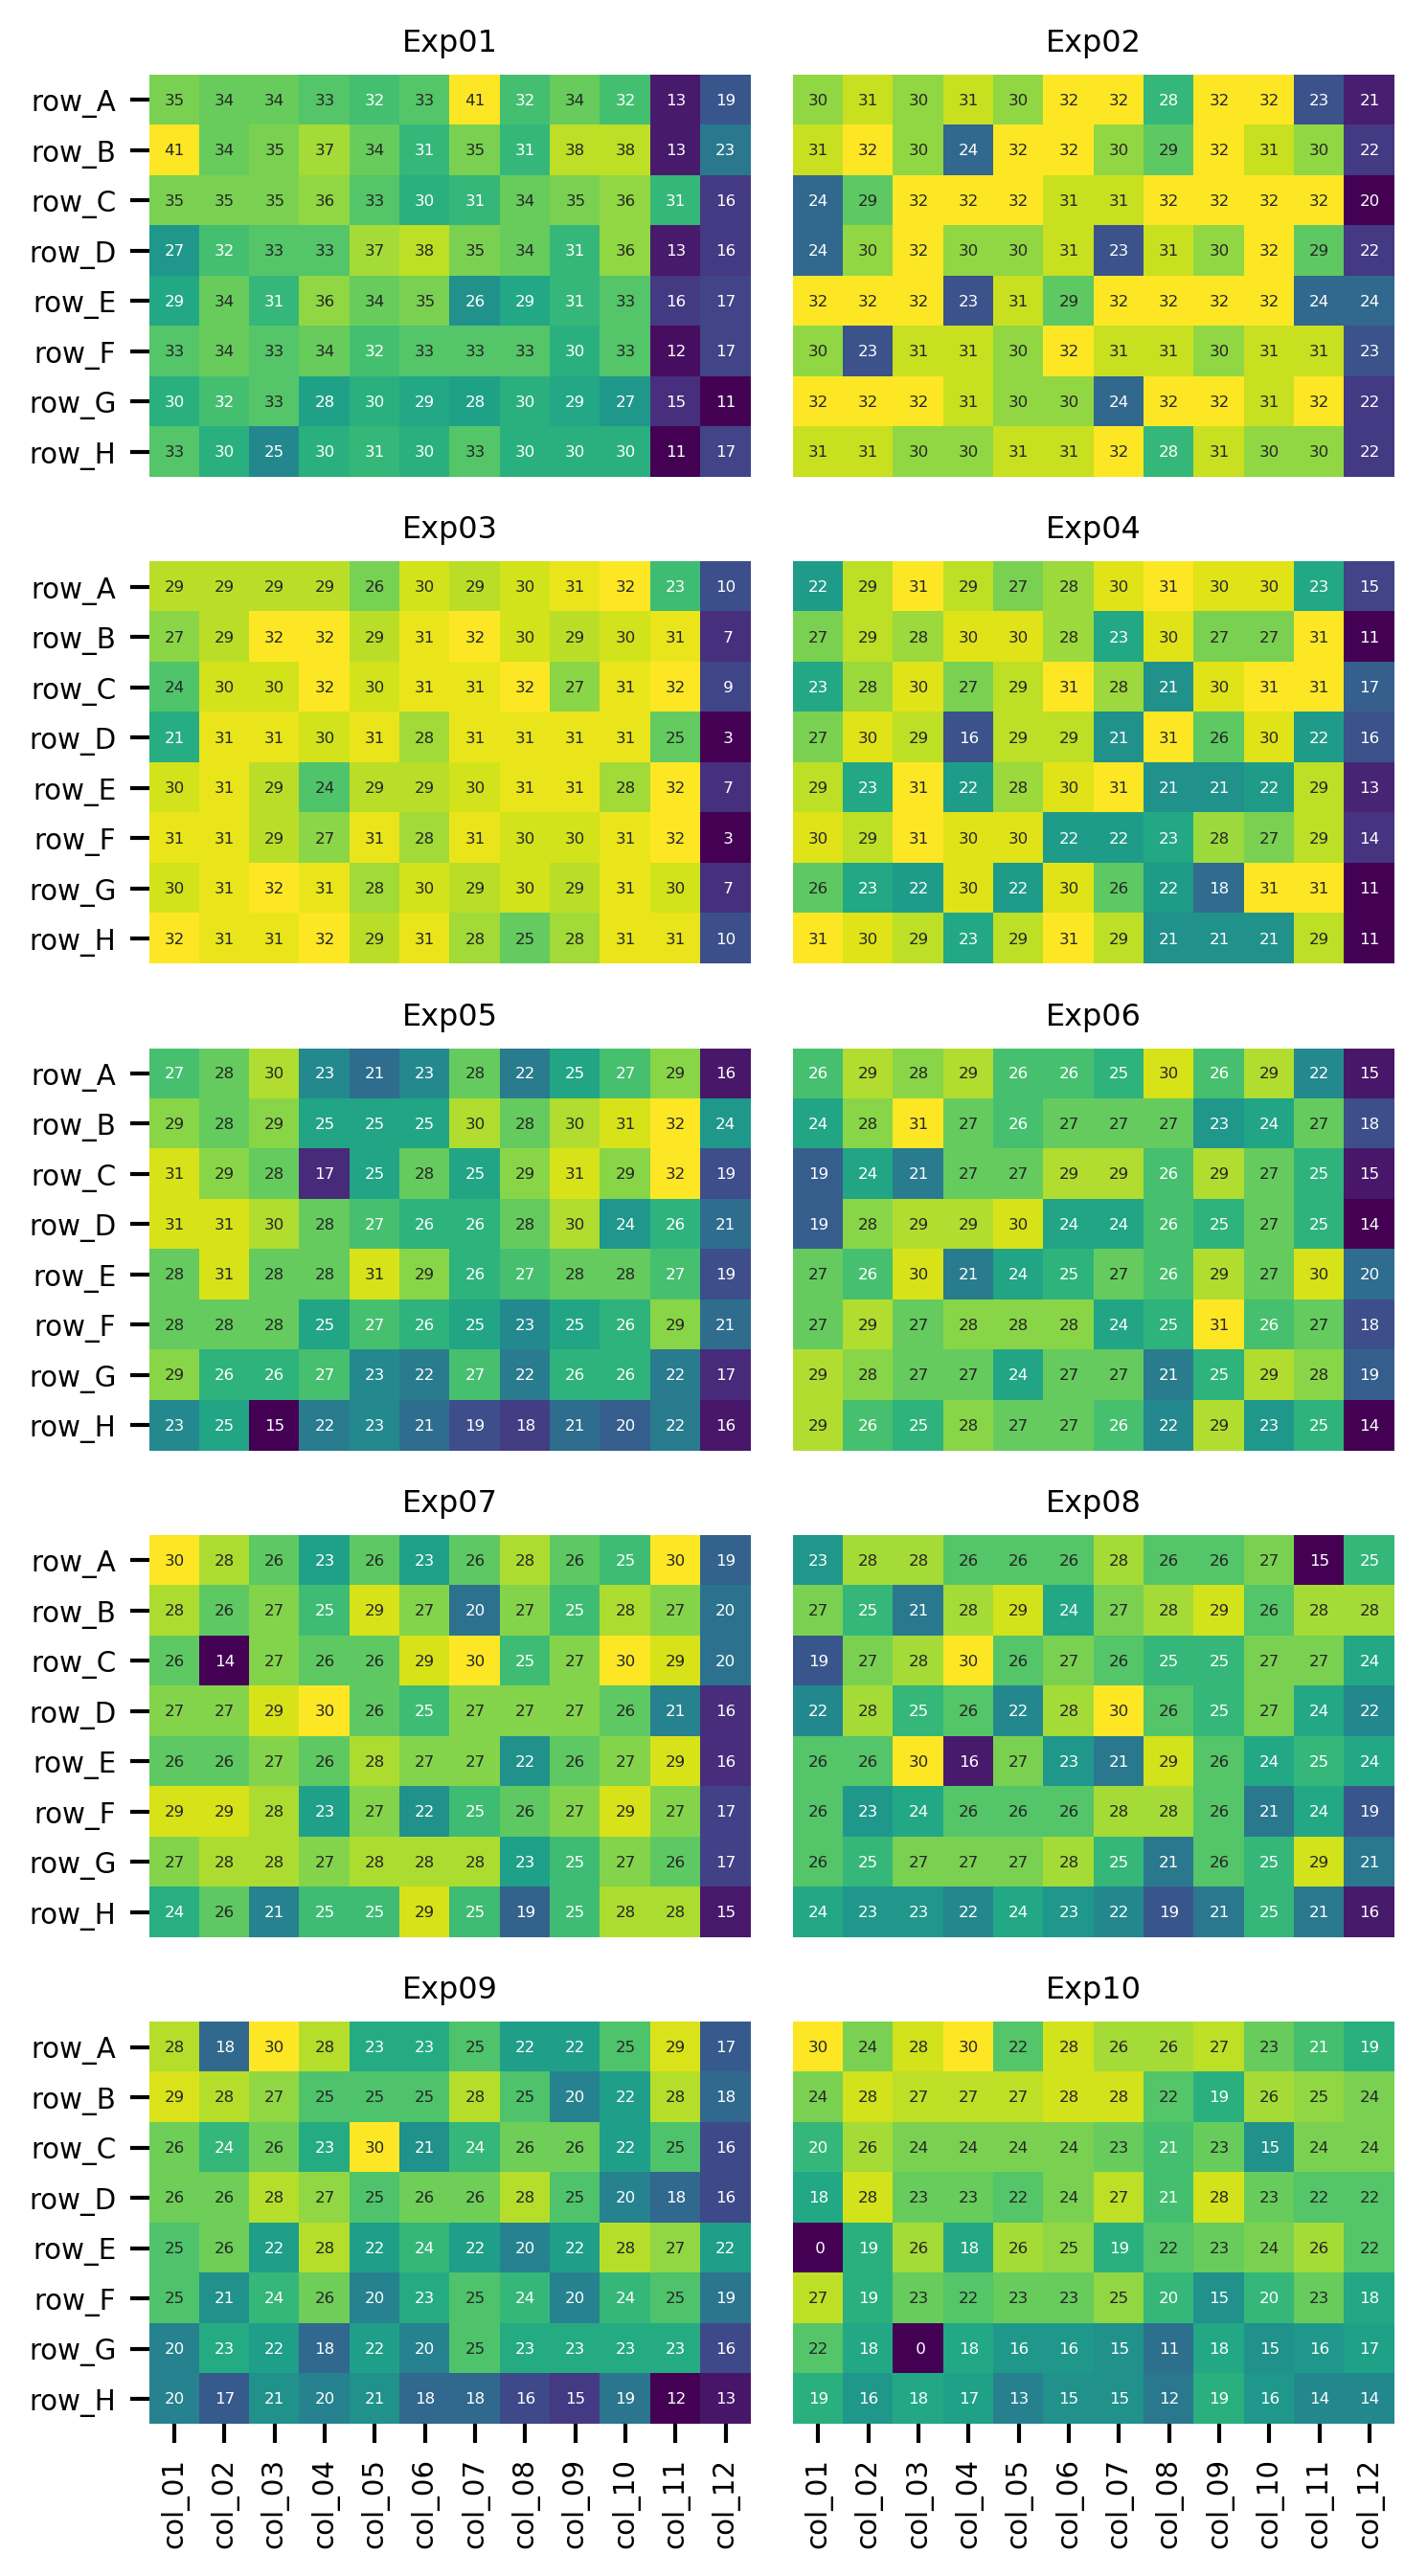

In [24]:
fig, axes = plt.subplots(ncols=2, nrows=5)
fig.set_size_inches(5, 9)

for ax, (exp, exp_df) in zip(np.ravel(axes), palte_count_by_exp.groupby(level='experiment')):
    exp_df.index = exp_df.index.droplevel('experiment')
    sns.heatmap(ax=ax, data=exp_df.astype(int), cbar=False, cmap='viridis', 
                annot=True, fmt='2d', annot_kws=dict(fontsize=4))
    if exp not in ['Exp09', 'Exp10']:
        ax.xaxis.set_ticks([])
    if exp not in ['Exp01', 'Exp03', 'Exp05', 'Exp07', 'Exp09']:
        ax.yaxis.set_ticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(exp)
fig.tight_layout()

## 3. Fancy Visualization

### 3.1 Visualization behind/beyond matplotlib
- Computer science side
- Data science side
- Interactive
- Large data
- 3D

<img src="https://github.com/pyviz/pyviz/raw/master/notebooks/assets/landscape_hv_nx.png">
<img src="./img/images.jpg">

### 3.2 Some tools above basic plot (not all in the above figure):
- [Holoviews](http://holoviews.org/): my favourite, see one interesting [demo](http://holoviews.org/getting_started/Gridded_Datasets.html).
- [Bokeh](https://bokeh.pydata.org/): Javascript with python wraper, not so easy to use, but it is the main backend of holoviews.
- [Altair](https://altair-viz.github.io/): VEGA/D3 based visualization grammar package, elegant data projection.
- [Echarts](http://echarts.baidu.com/): Totally javascript, fancy, but poor data projection facility.
- [plotly](https://plot.ly/d3-js-for-python-and-pandas-charts/) and [dash](https://dash.plot.ly/): good, but I don't like



### 3.3 How to choose
- You probably don't need these if you deal with normal scale biological data. You can even use R if you want.
- But, if you do have multiple dimensions and huge dataset, matplotlib or seaborn is no enough.

## 4. Take Home Message
- Data cleaning is the first step, which is a much more complex topic we don't cover today.
- Choose the best way to represent distribution.
- Use visual code (color first) or small multiple to represent other variables.
- Matplotlib and seaborn are just basic, there are a lot of fancy stuffs if needed.
- But always learn basic first.
- Choose R if you want, at least R is very good at data cleaning and matplotlib level plotting.